In [43]:
#Import relevant packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from IPython.display import display
from sklearn.preprocessing import StandardScaler




import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import the datasets
df = pd.read_csv('clean_train.csv')

In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df.drop('date_recorded', axis=1, inplace=True)

In [5]:
df.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,...,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,source_class,waterpoint_type_group,status_group
0,69572,6000.0,Roman,1390,Roman,34.938093,-9.856322,none,Lake Nyasa,Mnyusi B,...,1999,gravity,user-group,annually,good,enough,spring,groundwater,communal standpipe,functional
1,34310,25.0,Lottery Club,686,World Vision,37.460664,-3.821329,Kwa Mahundi,Pangani,Majengo,...,2009,gravity,user-group,per bucket,good,enough,dam,surface,communal standpipe,functional
2,67743,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,...,1986,submersible,user-group,never pay,good,dry,borehole,groundwater,communal standpipe,non functional
3,9944,20.0,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,Pangani,Moa/Mwereme,...,2009,submersible,user-group,per bucket,salty,enough,other,unknown,communal standpipe,functional
4,19816,0.0,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,Internal,Ishinabulandi,...,0,handpump,user-group,never pay,good,enough,borehole,groundwater,hand pump,non functional


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46962 entries, 0 to 46961
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     46962 non-null  int64  
 1   amount_tsh             46962 non-null  float64
 2   funder                 46962 non-null  object 
 3   gps_height             46962 non-null  int64  
 4   installer              46962 non-null  object 
 5   longitude              46962 non-null  float64
 6   latitude               46962 non-null  float64
 7   wpt_name               46962 non-null  object 
 8   basin                  46962 non-null  object 
 9   subvillage             46962 non-null  object 
 10  region                 46962 non-null  object 
 11  region_code            46962 non-null  int64  
 12  district_code          46962 non-null  int64  
 13  lga                    46962 non-null  object 
 14  ward                   46962 non-null  object 
 15  po

In [7]:
# Convert boolean to integers for columns 'permit' and 'public_meeting' (0=False, 1=True)
df['permit'] = df['permit'].astype(int)
df['public_meeting'] = df['public_meeting'].astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46962 entries, 0 to 46961
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     46962 non-null  int64  
 1   amount_tsh             46962 non-null  float64
 2   funder                 46962 non-null  object 
 3   gps_height             46962 non-null  int64  
 4   installer              46962 non-null  object 
 5   longitude              46962 non-null  float64
 6   latitude               46962 non-null  float64
 7   wpt_name               46962 non-null  object 
 8   basin                  46962 non-null  object 
 9   subvillage             46962 non-null  object 
 10  region                 46962 non-null  object 
 11  region_code            46962 non-null  int64  
 12  district_code          46962 non-null  int64  
 13  lga                    46962 non-null  object 
 14  ward                   46962 non-null  object 
 15  po

In [84]:
dfcopy=df.copy()
dfcopy.drop(['installer','id', 'region_code'],axis=1)

,amount_tsh,funder,gps_height,longitude,latitude,wpt_name,basin,subvillage,region,district_code,...,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,source_class,waterpoint_type_group,status_group,North_South
0,6000.0,Roman,1390,34.938093,-9.856322,none,Lake Nyasa,Mnyusi B,Iringa,5,...,gravity,user-group,annually,good,enough,spring,groundwater,communal standpipe,functional,South
1,25.0,Lottery Club,686,37.460664,-3.821329,Kwa Mahundi,Pangani,Majengo,Manyara,4,...,gravity,user-group,per bucket,good,enough,dam,surface,communal standpipe,functional,North
2,0.0,Unicef,263,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,63,...,submersible,user-group,never pay,good,dry,borehole,groundwater,communal standpipe,non functional,South
3,20.0,Mkinga Distric Coun,0,39.172796,-4.765587,Tajiri,Pangani,Moa/Mwereme,Tanga,8,...,submersible,user-group,per bucket,salty,enough,other,unknown,communal standpipe,functional,North
4,0.0,Dwsp,0,33.362410,-3.766365,Kwa Ngomho,Internal,Ishinabulandi,Shinyanga,3,...,handpump,user-group,never pay,good,enough,borehole,groundwater,hand pump,non functional,North
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46957,500.0,World Bank,351,37.634053,-6.124830,Chimeredya,Wami / Ruvu,Komstari,Morogoro,6,...,submersible,user-group,monthly,good,enough,borehole,groundwater,communal standpipe,non functional,South
46958,10.0,Germany Republi,1210,37.169807,-3.253847,Area Three Namba 27,Pangani,Kiduruni,Kilimanjaro,5,...,gravity,user-group,per bucket,good,enough,spring,groundwater,communal standpipe,functional,North
46959,4700.0,Cefa-njombe,1212,35.249991,-9.070629,Kwa Yahona Kuvala,Rufiji,Igumbilo,Iringa,4,...,gravity,user-group,annually,good,enough,river/lake,surface,communal standpipe,functional,South
46960,0.0,Malec,0,35.861315,-6.378573,Mshoro,Rufiji,Mwinyi,Dodoma,4,...,handpump,user-group,never pay,good,insufficient,shallow well,groundwater,hand pump,functional,South


In [103]:
df['funder'].value_counts().head(60)

Government Of Tanzania            7855
Danida                            2920
Kkkt                              1260
Hesawa                            1172
World Bank                        1086
World Vision                      1044
Unicef                             987
District Council                   951
Private Individual                 764
Norad                              759
Tasaf                              746
Rwssp                              641
Fini Water                         639
Germany Republi                    610
Tcrs                               544
Ministry Of Water                  526
Water                              510
Dwe                                472
Netherlands                        457
Dhv                                456
Hifab                              435
Lga                                429
Adb                                396
Amref                              374
Oxfam                              358
0                        

## Funder

In [101]:
df['funder'].replace(('Kkkt_makwale'), ('KKKT'), inplace=True)
df['funder'].replace(('Finw', 'Fw'), ('Fini Water'), inplace=True)
df['funder'].replace(('Mkinga Distric Coun'), ('District Council'), inplace=True)
df['funder'].replace(('Finw', 'Fw'), ('Fini Water'), inplace=True)
df['funder'].replace(('Finw', 'Fw'), ('Fini Water'), inplace=True)

In [95]:
dfcopy['funder'].value_counts().sum()

46962

# Visuals

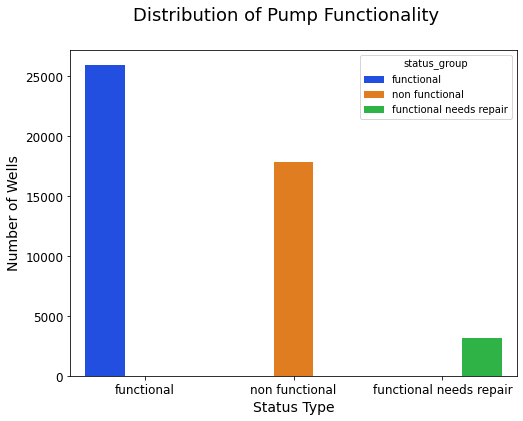

In [9]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x='status_group', hue="status_group", palette='bright', data=df)

fig.suptitle('Distribution of Pump Functionality', fontsize=18)
plt.xlabel("Status Type", fontsize=14)
plt.ylabel("Number of Wells", fontsize=14)
plt.tick_params(labelsize='large')
plt.show()


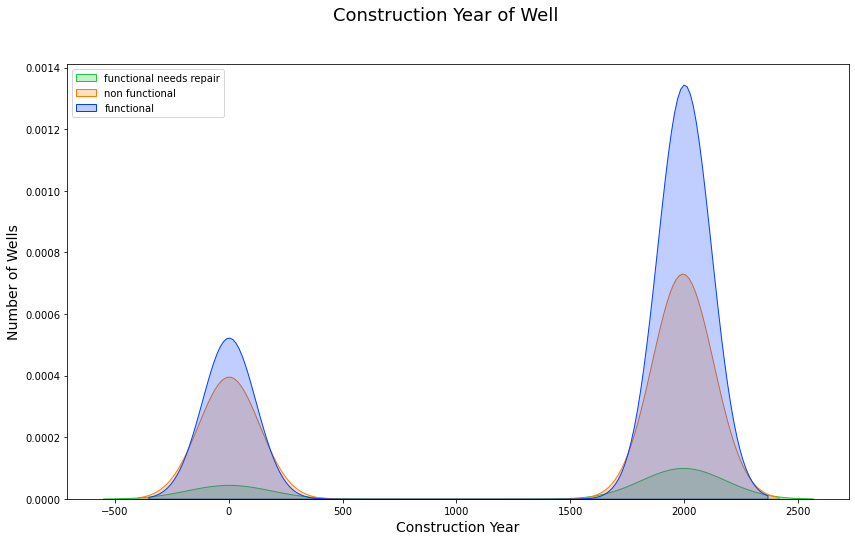

In [10]:
fig, ax = plt.subplots(figsize=(14,8))
ax = sns.kdeplot(data=df, x='construction_year', hue='status_group', palette='bright', fill=True)
fig.suptitle('Construction Year of Well', fontsize=18)
plt.xlabel("Construction Year", fontsize=14)
plt.ylabel("Number of Wells", fontsize=14)
plt.legend(loc='upper left', labels=['functional needs repair', 'non functional', 'functional'])
plt.show();

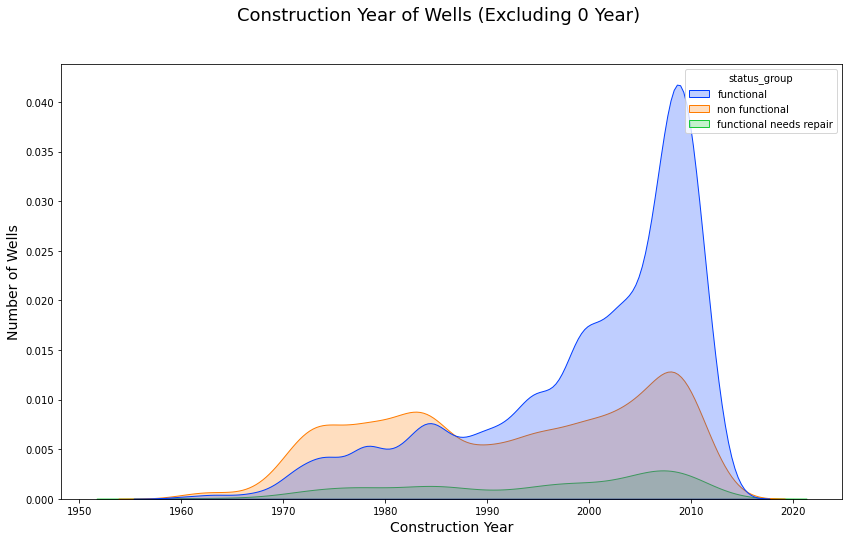

In [11]:
#Select wells without 'construction_year' = 0
df_actual_construction_years = df.loc[df['construction_year'] != 0]

fig, ax = plt.subplots(figsize=(14,8))
ax = sns.kdeplot(data=df_actual_construction_years, x='construction_year', hue='status_group', palette='bright', fill=True)
fig.suptitle('Construction Year of Wells (Excluding 0 Year)', fontsize=18)
plt.xlabel("Construction Year", fontsize=14)
plt.ylabel("Number of Wells", fontsize=14)
#plt.legend(loc='upper left', labels=['functional needs repair', 'non functional', 'functional'])
plt.show();

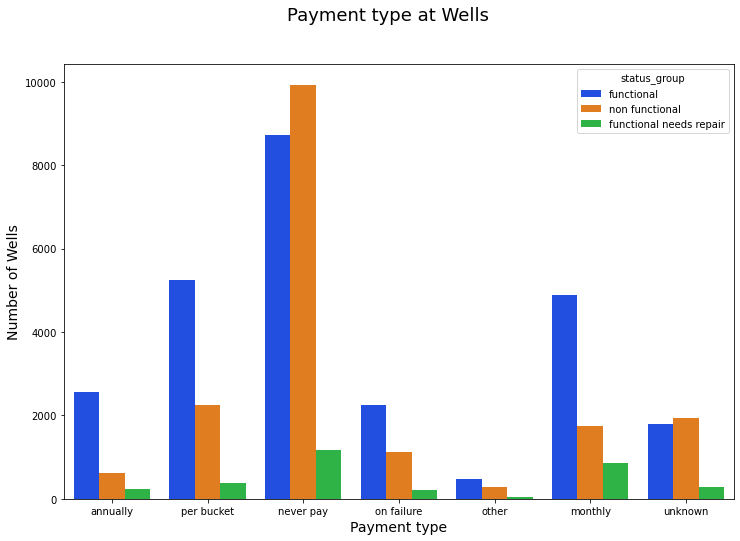

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='payment_type', hue="status_group", palette='bright', data=df)

fig.suptitle('Payment type at Wells', fontsize=18)
plt.xlabel("Payment type", fontsize=14)
plt.ylabel("Number of Wells", fontsize=14)
plt.show()

In [15]:
df['North_South'] = np.where(df['latitude'] >= -5.1, 'North', 'South')

In [16]:
df

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,...,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,source_class,waterpoint_type_group,status_group,North_South
0,69572,6000.0,Roman,1390,Roman,34.938093,-9.856322,none,Lake Nyasa,Mnyusi B,...,gravity,user-group,annually,good,enough,spring,groundwater,communal standpipe,functional,South
1,34310,25.0,Lottery Club,686,World Vision,37.460664,-3.821329,Kwa Mahundi,Pangani,Majengo,...,gravity,user-group,per bucket,good,enough,dam,surface,communal standpipe,functional,North
2,67743,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,...,submersible,user-group,never pay,good,dry,borehole,groundwater,communal standpipe,non functional,South
3,9944,20.0,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,Pangani,Moa/Mwereme,...,submersible,user-group,per bucket,salty,enough,other,unknown,communal standpipe,functional,North
4,19816,0.0,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,Internal,Ishinabulandi,...,handpump,user-group,never pay,good,enough,borehole,groundwater,hand pump,non functional,North
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46957,11164,500.0,World Bank,351,ML appro,37.634053,-6.124830,Chimeredya,Wami / Ruvu,Komstari,...,submersible,user-group,monthly,good,enough,borehole,groundwater,communal standpipe,non functional,South
46958,60739,10.0,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,Pangani,Kiduruni,...,gravity,user-group,per bucket,good,enough,spring,groundwater,communal standpipe,functional,North
46959,27263,4700.0,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,Rufiji,Igumbilo,...,gravity,user-group,annually,good,enough,river/lake,surface,communal standpipe,functional,South
46960,31282,0.0,Malec,0,Musa,35.861315,-6.378573,Mshoro,Rufiji,Mwinyi,...,handpump,user-group,never pay,good,insufficient,shallow well,groundwater,hand pump,functional,South


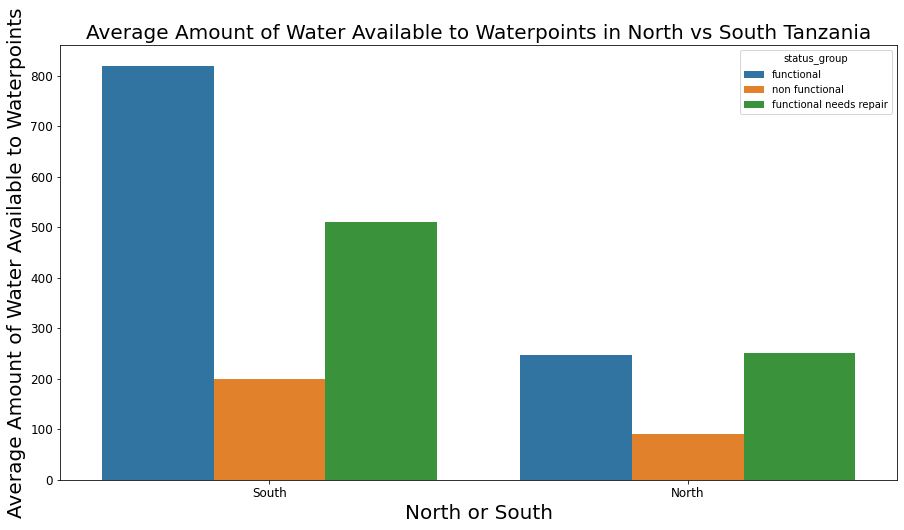

In [17]:
fig, ax = plt.subplots(figsize = (15 , 8))

import matplotlib.ticker as ticker
from matplotlib import pyplot as plt

sns.barplot(x=df["North_South"], y=df['amount_tsh'], hue=df["status_group"], ci = None)
ax.set_xlabel('North or South', fontsize = 20)
ax.set_ylabel('Average Amount of Water Available to Waterpoints', fontsize = 20)
ax.set_title('Average Amount of Water Available to Waterpoints in North vs South Tanzania', fontsize = 20)
plt.ticklabel_format(style='plain',axis='y')
ax.tick_params(axis='both', which='major', labelsize=12);

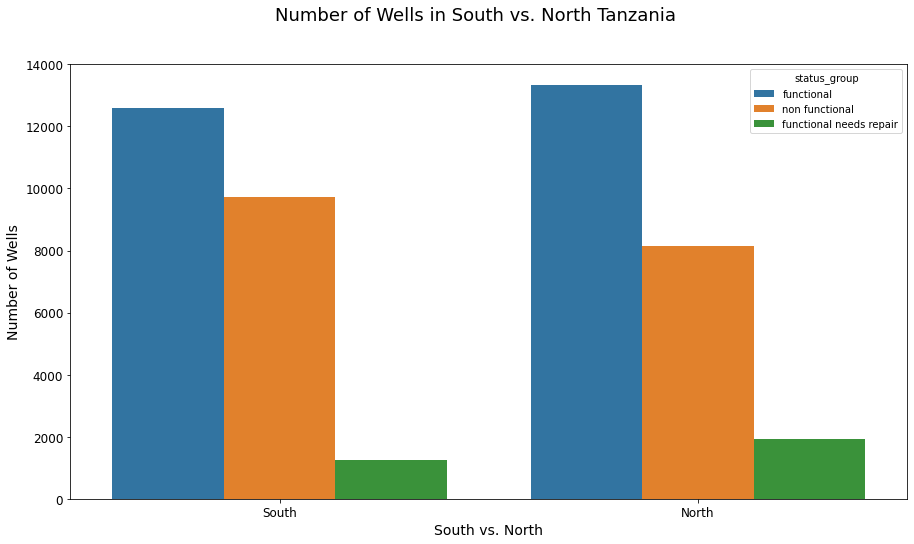

In [18]:
fig, ax = plt.subplots(figsize = (15 , 8))
ax = sns.countplot(x='North_South', hue="status_group", data=df)

fig.suptitle('Number of Wells in South vs. North Tanzania', fontsize=18)
plt.xlabel('South vs. North', fontsize=14)
plt.ylabel('Number of Wells', fontsize=14)
plt.ticklabel_format(style='plain',axis='y')
ax.tick_params(axis='both', which='major', labelsize=12);

# Modeling

## 1st Model - Logistic Regression

In [19]:
df['management_group'].value_counts()

user-group    42078
commercial     2996
parastatal     1267
other           547
unknown          74
Name: management_group, dtype: int64

In [20]:
#Create smaller dataset for 1st model
test1 = df[['status_group', 'construction_year', 'waterpoint_type_group']]
test1 = pd.get_dummies(test1, columns=['construction_year', 'waterpoint_type_group'])

#Assign X and y
X = test1.drop('status_group', axis=1)
y = test1['status_group']

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15)

In [25]:
# Instantiate a scaler object
scaler = StandardScaler()

# Fit the scaler on X_train and transform X_train
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

# Transform X_test
X_test_scaled = scaler.transform(X_test)

In [26]:
#Instantiate Logistic Regression Model
logreg = LogisticRegression()

#Fit logreg onto training data
logreg.fit(X_train_scaled, y_train)

#Create predict variable
y_pred = logreg.predict(X_test_scaled)

#Find Accuracy Score
accuracy_score(y_test, y_pred)

0.6367636621717531

In [31]:
cross_val_score(logreg, X, y, cv=5, scoring='accuracy').mean()

0.6342787775919978

In [28]:
y.value_counts(normalize=True)

functional                 0.552170
non functional             0.380563
functional needs repair    0.067267
Name: status_group, dtype: float64

In [ ]:
#cm_plot = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred, labels=logreg.classes_), display_labels=logreg.classes_)
#fig, ax = plt.subplots(figsize=(10,8))
#cm_plot.plot(ax=ax)
#plt.show()

## Simple Decision Tree

In [32]:
df_noid = df.copy()

In [53]:
tree1 = df_noid[['construction_year', 'amount_tsh', 'status_group']]

X = tree1.drop('status_group', axis=1)
y = tree1['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15)

dt = DecisionTreeClassifier(max_depth=2, random_state=1)

dt.fit(X_train, y_train)

y_pred= dt.predict(X_test)

accuracy_score(y_test, y_pred)

0.5855216465578424

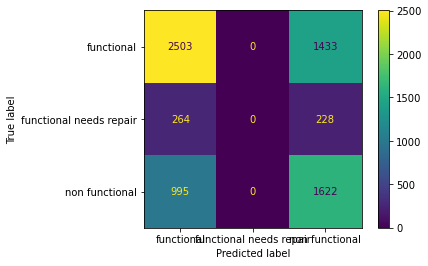

In [54]:
plot_confusion_matrix(dt, X_test, y_test);

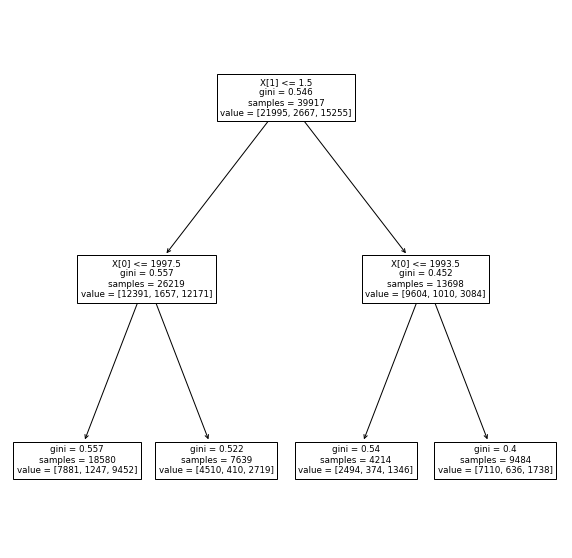

In [55]:
f, ax = plt.subplots(figsize=(10, 10))
plot_tree(dt, ax=ax);

## 2nd Decision Tree

In [61]:
tree2= df[['status_group', 'amount_tsh', 'waterpoint_type_group','quality_group']]

tree2 = pd.get_dummies(tree2, columns=['waterpoint_type_group', 'quality_group', 'amount_tsh'])

X = tree2.drop('status_group', axis=1)
y = tree2['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15)

dt2 = DecisionTreeClassifier(max_depth=2, random_state=1)

dt2.fit(X_train, y_train)

y_pred = dt2.predict(X_test)

accuracy_score(y_test, y_pred)

0.6224272533711852

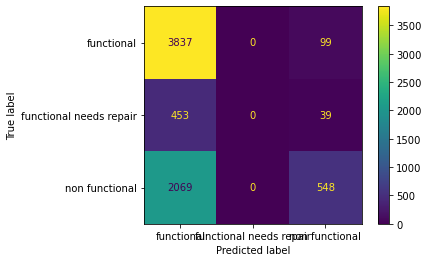

In [62]:
#Confusion Matrix with DecisionTreeClassifier
plot_confusion_matrix(dt2, X_test, y_test);

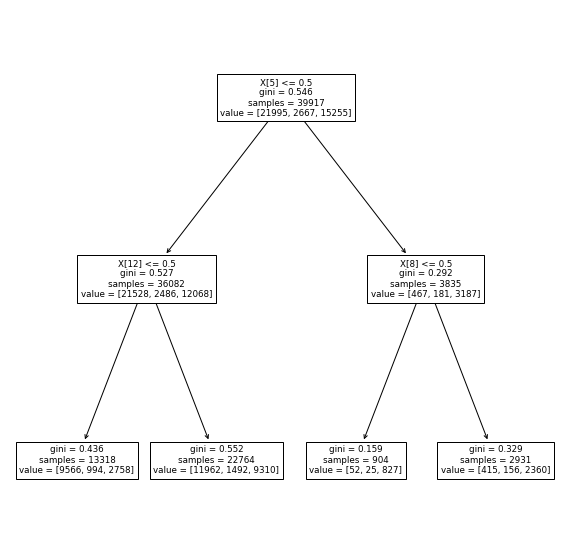

In [63]:
f, ax = plt.subplots(figsize=(10, 10))
plot_tree(dt2, ax=ax);

In [74]:
tree2.columns[5]

'waterpoint_type_group_improved spring'

In [78]:
feature_used = tree2
for fi, feature in zip(dt2.feature_importances_, feature_used):
    print(fi, feature)

0.0 status_group
0.0 waterpoint_type_group_cattle trough
0.0 waterpoint_type_group_communal standpipe
0.0 waterpoint_type_group_dam
0.0 waterpoint_type_group_hand pump
0.7099890130061823 waterpoint_type_group_improved spring
0.0 waterpoint_type_group_other
0.0 quality_group_colored
0.005911564236068591 quality_group_fluoride
0.0 quality_group_good
0.0 quality_group_milky
0.0 quality_group_salty
0.2840994227577491 quality_group_unknown
0.0 amount_tsh_0.0
0.0 amount_tsh_0.2
0.0 amount_tsh_1.0
0.0 amount_tsh_2.0
0.0 amount_tsh_5.0
0.0 amount_tsh_6.0
0.0 amount_tsh_7.0
0.0 amount_tsh_9.0
0.0 amount_tsh_10.0
0.0 amount_tsh_12.0
0.0 amount_tsh_15.0
0.0 amount_tsh_20.0
0.0 amount_tsh_25.0
0.0 amount_tsh_30.0
0.0 amount_tsh_33.0
0.0 amount_tsh_35.0
0.0 amount_tsh_40.0
0.0 amount_tsh_50.0
0.0 amount_tsh_53.0
0.0 amount_tsh_60.0
0.0 amount_tsh_70.0
0.0 amount_tsh_100.0
0.0 amount_tsh_150.0
0.0 amount_tsh_200.0
0.0 amount_tsh_220.0
0.0 amount_tsh_250.0
0.0 amount_tsh_300.0
0.0 amount_tsh_350.0
0.

In [82]:
X = df.drop('status_group', axis=1)
y = df['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15)

dt2 = DecisionTreeClassifier(max_depth=2, random_state=1)

dt2.fit(X_train, y_train)

y_pred = dt2.predict(X_test)

accuracy_score(y_test, y_pred)

ValueError: could not convert string to float: 'Lga'

In [ ]:
tree2= df[['status_group', 'amount_tsh', 'waterpoint_type_group','quality_group']]

tree2 = pd.get_dummies(tree2, columns=['waterpoint_type_group', 'quality_group', 'amount_tsh'])

X = tree2.drop('status_group', axis=1)
y = tree2['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15)

dt2 = DecisionTreeClassifier(max_depth=2, random_state=1)

dt2.fit(X_train, y_train)

y_pred = dt2.predict(X_test)

accuracy_score(y_test, y_pred)

In [81]:
feature_used = df
for fi, feature in zip(dt2.feature_importances_, feature_used):
    print(fi, feature)

0.0 id
0.0 amount_tsh
0.0 funder
0.0 gps_height
0.0 installer
0.7099890130061823 longitude
0.0 latitude
0.0 wpt_name
0.005911564236068591 basin
0.0 subvillage
0.0 region
0.0 region_code
0.2840994227577491 district_code
0.0 lga
0.0 ward
0.0 population
0.0 public_meeting
0.0 scheme_management
0.0 permit
0.0 construction_year
0.0 extraction_type_class
0.0 management_group
0.0 payment_type
0.0 quality_group
0.0 quantity
0.0 source_type
0.0 source_class
0.0 waterpoint_type_group
0.0 status_group
0.0 North_South


## Advanced Decision Tree

In [49]:
df_test3 = df[['construction_year', 'waterpoint_type_group', 'quantity', 'quality_group', 'extraction_type_class', 
               'management_group', 'permit', 'basin', 'status_group', 'amount_tsh']]

df_test3 = pd.get_dummies(df_test3, columns=['waterpoint_type_group', 'quality_group', 'extraction_type_class', 
                                             'quantity','management_group', 'permit', 'basin', 'amount_tsh'])

X = df_test3.drop('status_group', axis=1)
y = df_test3['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15)

dt = DecisionTreeClassifier(random_state=1)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

accuracy_score(y_test, y_pred)

0.7646557842441448

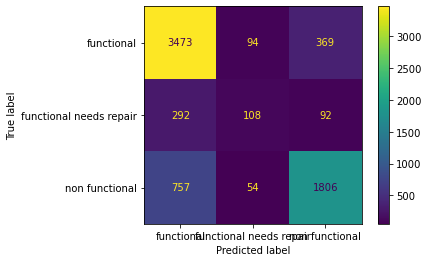

In [50]:
#Confusion Matrix with DecisionTreeClassifier
plot_confusion_matrix(dt, X_test, y_test);

In [51]:
knn = KNeighborsClassifier()
knn = knn.fit(X_train, y_train)

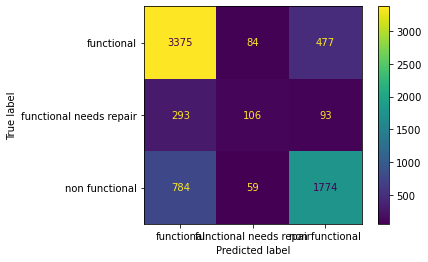

In [52]:
#Confusion Matrix with KNeighborsClassifier
plot_confusion_matrix(knn, X_test, y_test);

In [19]:
df.columns

Index(['id', 'amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'wpt_name', 'basin', 'subvillage', 'region', 'region_code',
       'district_code', 'lga', 'ward', 'population', 'public_meeting',
       'scheme_management', 'permit', 'construction_year',
       'extraction_type_class', 'management_group', 'payment_type',
       'quality_group', 'quantity', 'source_type', 'source_class',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [20]:
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,public_meeting,permit,construction_year
count,46962.000000,46962.000000,46962.000000,46962.000000,46962.000000,46962.000000,46962.000000,46962.000000,46962.000000,46962.000000,46962.000000
mean,37115.876198,370.593978,721.301542,35.179871,-5.861588,14.705123,5.834547,181.671798,0.911184,0.694881,1380.688791
std,21443.914412,2867.433657,698.454483,2.684188,2.744181,17.468023,9.818294,478.183092,0.284482,0.460463,922.330278
min,2.000000,0.000000,-90.000000,29.607122,-11.649440,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18560.250000,0.000000,0.000000,33.196012,-8.410366,5.000000,2.000000,0.000000,1.000000,0.000000,0.000000
50%,37060.500000,0.000000,530.500000,35.353205,-5.108867,11.000000,3.000000,40.000000,1.000000,1.000000,1989.000000
75%,55665.750000,50.000000,1348.000000,37.404240,-3.375047,17.000000,5.000000,210.000000,1.000000,1.000000,2005.000000
max,74247.000000,250000.000000,2770.000000,40.323402,-0.998464,99.000000,80.000000,30500.000000,1.000000,1.000000,2013.000000


# One Hot Encoder

In [95]:
#import package 
from sklearn.preprocessing import OneHotEncoder

#instantiate
ohe = OneHotEncoder()

#fit and transform
df_encoded = ohe.fit_transform(df)

In [98]:
s = pd.DataFrame(df_encoded.todense(), columns=ohe.get_feature_names()) 
s

,x0_2,x0_3,x0_4,x0_5,x0_6,x0_7,x0_8,x0_9,x0_11,x0_12,...,x27_communal standpipe,x27_dam,x27_hand pump,x27_improved spring,x27_other,x28_functional,x28_functional needs repair,x28_non functional,x29_North,x29_South
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
46958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
46959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
46960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [97]:
# Instantiate and fit a DecisionTreeClassifier with optimal parameters
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=30, min_impurity_decrease=0.0, min_samples_split=30) 
tree_clf.fit(X_train, y_train)

plot_feature_importances(tree_clf)

NameError: name 'plot_feature_importances' is not defined

# Modeling

In [ ]:
df.info()

In [ ]:
df_test3 = df[['construction_year', 'waterpoint_type_group', 'quantity', 'quality_group', 'extraction_type_class', 
               'management_group', 'permit', 'basin', 'status_group', 'amount_tsh']]

df_test3 = pd.get_dummies(df_test3, columns=['waterpoint_type_group', 'quality_group', 'extraction_type_class', 
                                             'quantity','management_group', 'permit', 'basin', 'amount_tsh'])

X = df_test2.drop('status_group', axis=1)
y = df_test2['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15)

dt = DecisionTreeClassifier(random_state=1)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

accuracy_score(y_test, y_pred)

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier(max_depth=2, random_state = 1)

clf.fit(X_train, y_train)

fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (3,3), dpi=300)
tree.plot_tree(clf,
               feature_names = df.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show();

In [ ]:
df_test2 = df[['ward','status_group', 'amount_tsh']]

df_test2 = pd.get_dummies(df_test2, columns=['ward', 'amount_tsh'])

X = df_test2.drop('status_group', axis=1)
y = df_test2['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15)

dt = DecisionTreeClassifier(random_state=1)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# Create lists of categorical and continuous columns
cat_col = df[['funder','wpt_name','basin','subvillage','region','lga', 'ward','scheme_management',
           'extraction_type_class' ,'management_group', 'payment_type','quality_group', 'quantity','source_type', 
           'source_class', 'waterpoint_type_group','status_group']]
cont_col = df[['id','amount_tsh','gps_height','longitude','latitude', 'region_code', 'district_code','population',
            'construction_year']]

In [ ]:
# generate binary values using get_dummies
dum_df = pd.get_dummies(cat_col)

In [ ]:
dum_df

In [ ]:
df1 = tree_train(cat_col)


X = dum_df.drop('status_group', axis=1)
y = dum_df['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15)

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_train, y_train)

y_pred = tree_clf.predict(X_test)

accuracy_score(y_test, y_pred)